<a href="https://colab.research.google.com/github/BriefCud/PRA3024-Big-Data-in-Phys/blob/master/Copy_of_Copy_of_velopix_tracking_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Track reconstruction made easy
==============================

This is a pet project to do track reconstruction,
based on real data coming from the LHCb detector at CERN.

Think you can make it better? Go ahead and try!

What is track reconstruction?
-----------------------------

At the LHCb detector, millions of particles collide at speeds
close to the speed of light, leaving traces (hits) on the sensors
placed in their way.

The collisions that happen at the same time are packed
into an *event*, and sent to one of our servers,
that must reconstruct the tracks that formed each particle
in real time.

This project contains events in json format. These events are
then processed by some reconstruction algorithm, and finally
the results are validated. That is, the particles found by
the solver are matched against the real particles that came out of
the collisions in the event.

![velopix reconstruction example](reco_example.png "velopix reconstruction example")

Diving into details
-------------------

Input files are specified in json. An *event model* to parse them
is shipped with this project.

In [0]:
!git clone https://github.com/dcampora/python_introduction.git

fatal: destination path 'python_introduction' already exists and is not an empty directory.


In [0]:
!pwd
%cd python_introduction/
!pwd

/content
/content/python_introduction
/content/python_introduction


In [0]:
import event_model as em
import json
f = open("velojson/1.json")
json_data = json.loads(f.read())
event = em.event(json_data)
f.close()

The LHCb Velopix detector has 52 modules. Spread across the modules,
we should have many hits, depending on the event we are on.

In [0]:
print(len(event.modules))
print(len(event.hits))

52
3366


Hits are composed of an ID, and {x, y, z} coordinates.

In [0]:
print(event.hits[0])

#0 id 44897 module 0 {-9.821713, 29.362608, -275.531006}


Modules are placed at some z in the detector. Each module
may have as many hits as particles crossed by it, plus some noise to
make things interesting.

In [0]:
print(event.modules[0])

module 0:
 At z: -275
 Number of hits: 84
 Hits (#id {x, y, z}): [#0 id 44897 module 0 {-9.821713, 29.362608, -275.531006}, #1 id 65861 module 0 {-5.446491, 27.165274, -275.531006}, #2 id 86726 module 0 {-7.345661, 18.978745, -275.531006}, #3 id 109170 module 0 {-0.643469, 18.862074, -275.531006}, #4 id 117231 module 0 {-4.29921, 12.795097, -275.531006}, #5 id 121706 module 0 {1.573313, 17.267546, -275.531006}, #6 id 132295 module 0 {-0.371232, 11.97839, -275.531006}, #7 id 143807 module 0 {1.70943, 10.519981, -275.531006}, #8 id 145568 module 0 {3.187283, 11.453362, -275.531006}, #9 id 151033 module 0 {0.523259, 7.194809, -275.531006}, #10 id 151354 module 0 {8.029196, 14.545187, -275.531006}, #11 id 155337 module 0 {3.051167, 8.400429, -275.531006}, #12 id 158672 module 0 {3.284512, 7.622612, -275.531006}, #13 id 159448 module 0 {3.090055, 7.194813, -275.531006}, #14 id 161253 module 0 {2.85671, 6.416996, -275.531006}, #15 id 162479 module 0 {5.151272, 8.322647, -275.531006}, #16 id 

Visually, the data looks like this:

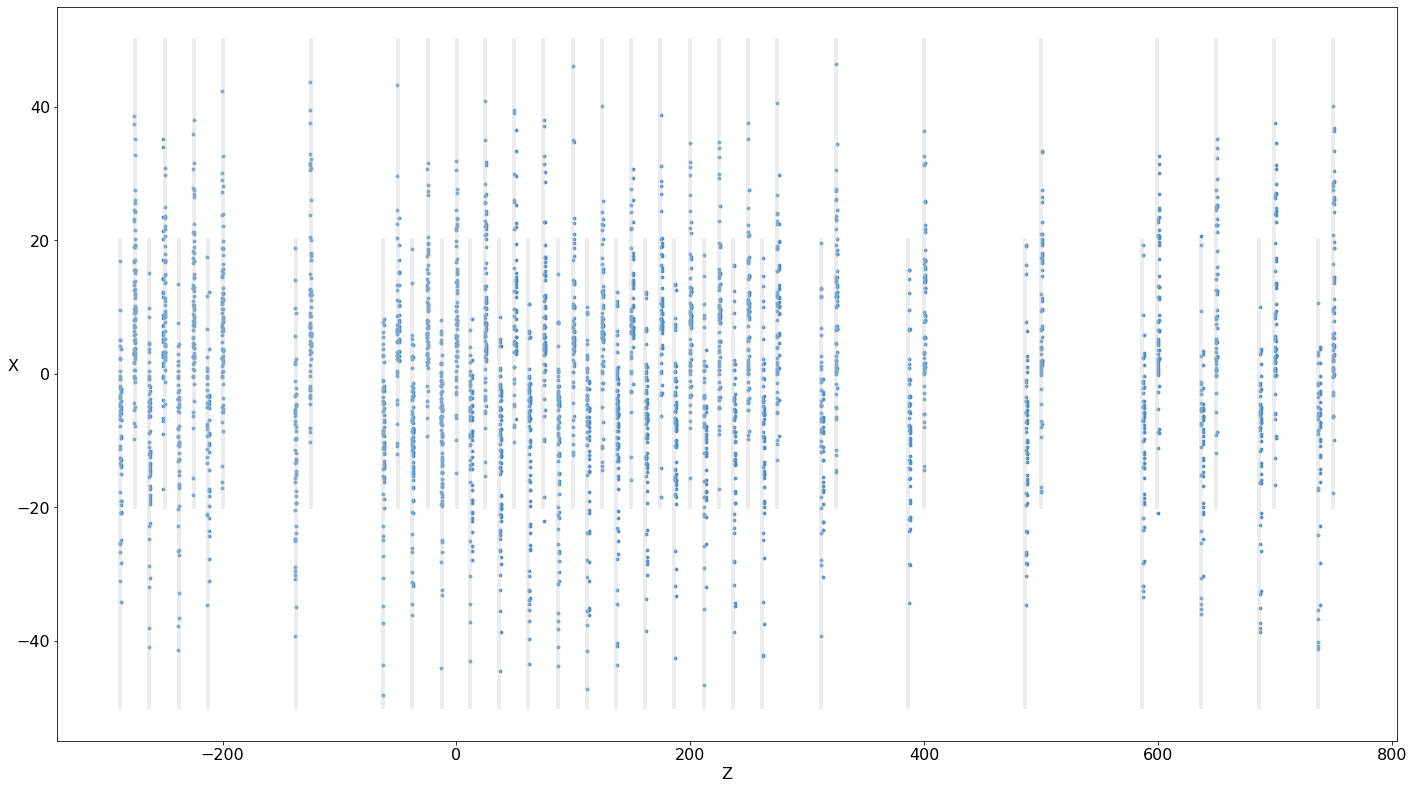

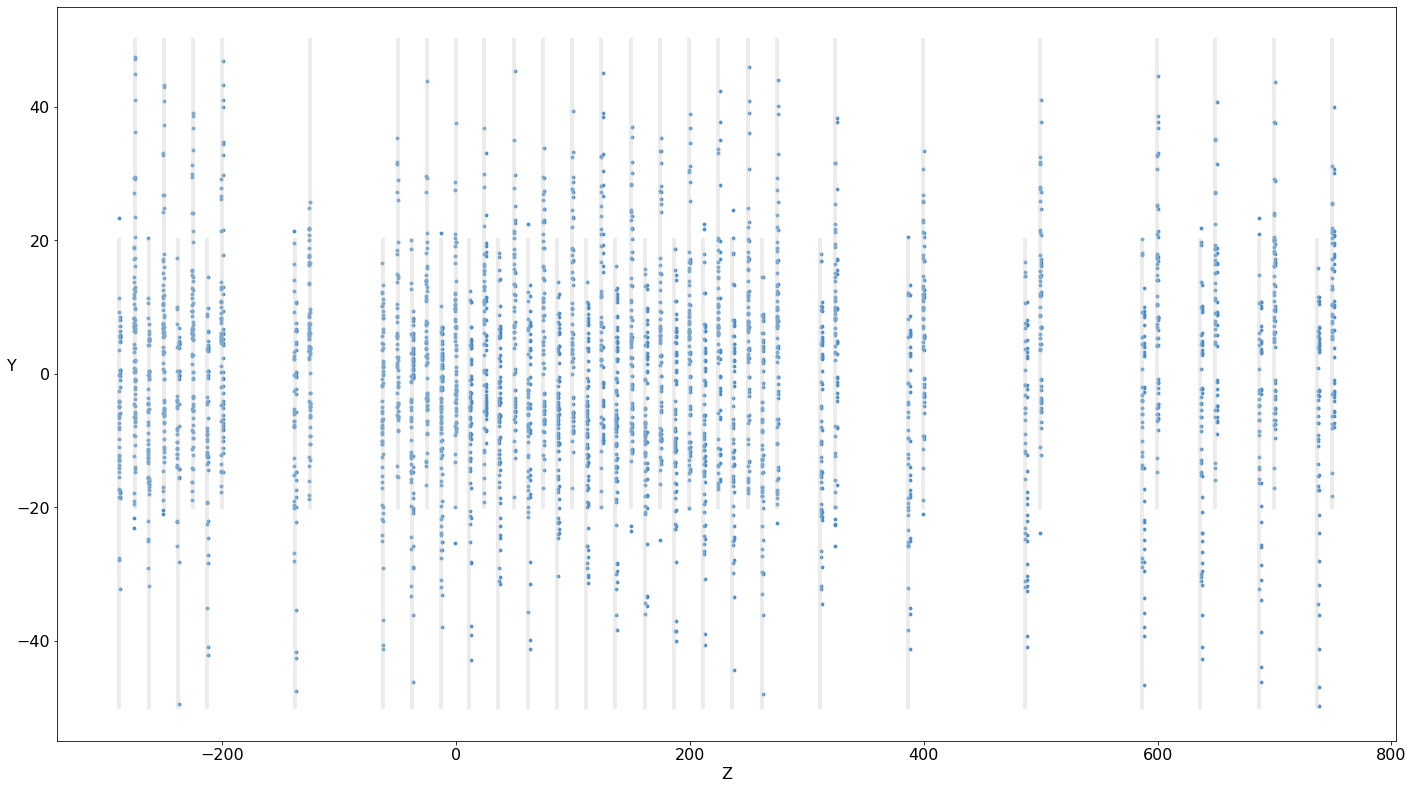

In [0]:
from visual.base import print_event_2d
%matplotlib inline

print_event_2d(event)
print_event_2d(event, y=1)

A tracking algorithm solution
----------------

A simplistic implementation runs through all sensors sequentially,
finding tracks by matching hits in a straight line.

In [0]:
from search_by_triplet_trie import search_by_triplet_trie
tracks = search_by_triplet_trie().solve(event)

print(len(tracks))
print(tracks[0])

i=0
while True:
  print(tracks[i])
  i+=1

Finally, we should validate these results, and we'll look
at three things:
    
*   Reconstruction Efficiency: The fraction of real particles we have reconstructed.
    > \# correctly reconstructed / \# real tracks

*   Clone Tracks: Tracks that are similar to other correctly reconstructed tracks.
    > \# clone tracks / \# correctly reconstructed

*   Fake Tracks: Tracks that are incorrect, either created by noise or by incorrectly reconstructing a track.
    > \# incorrectly reconstructed / \# all reconstructed

We will get the validation detailed for different kinds of particles.

In [0]:
for i in range(o):
  print(tracks[i])

Track hits #4: [#3261 id 52551389 module 50 {-2.782467, 12.678425, 749.468994}, #3152 id 50468051 module 48 {-0.215669, 10.889446, 699.468994}, #3044 id 48385223 module 46 {2.448358, 9.158798, 649.468994}, #2931 id 46302650 module 44 {5.170717, 7.447601, 599.468994}]
Track hits #4: [#3264 id 52570606 module 50 {-0.449014, 9.022682, 749.468994}, #3155 id 50475508 module 48 {-0.390677, 8.458763, 699.468994}, #3042 id 48380155 module 46 {-0.371232, 7.933739, 649.468994}, #3001 id 47711226 module 45 {-0.350018, 7.25138, 588.031006}]
Track hits #4: [#3274 id 52591832 module 50 {3.634529, 6.650337, 749.468994}, #3162 id 50495199 module 48 {3.42063, 6.280872, 699.468994}, #3048 id 48398824 module 46 {3.206728, 5.83363, 649.468994}, #2930 id 46302192 module 44 {2.973383, 5.444721, 599.468994}]
Track hits #4: [#3278 id 52729750 module 50 {14.575239, 20.599789, 750.531006}, #3165 id 50624718 module 48 {13.622412, 17.196838, 700.531006}, #3049 id 48403722 module 46 {12.61832, 13.689587, 649.46899

In [0]:
import validator_lite as vl
vl.validate_print([json_data], [tracks])

463 tracks including       37 ghosts (  8.0%). Event average   8.0%
              velo :      393 from      410 ( 95.9%,  95.9%)       15 clones (  3.82%), purity: ( 99.58%,  99.58%),  hitEff: ( 94.95%,  94.95%)
              long :      141 from      141 (100.0%, 100.0%)        5 clones (  3.55%), purity: ( 99.72%,  99.72%),  hitEff: ( 96.12%,  96.12%)
         long>5GeV :      100 from      100 (100.0%, 100.0%)        5 clones (  5.00%), purity: ( 99.61%,  99.61%),  hitEff: ( 94.97%,  94.97%)
      long_strange :        8 from        8 (100.0%, 100.0%)        1 clones ( 12.50%), purity: (100.00%, 100.00%),  hitEff: ( 88.89%,  88.89%)
 long_strange>5GeV :        6 from        6 (100.0%, 100.0%)        1 clones ( 16.67%), purity: (100.00%, 100.00%),  hitEff: ( 85.71%,  85.71%)
        long_fromb :        6 from        6 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
   long_fromb>5GeV :        6 from        6 (100.0%, 100.0%)        

And visually, we can see what our solution looks like:

In [0]:
print_event_2d(event, tracks=tracks)
print_event_2d(event, tracks=tracks, y=1)

Data analysis exercises
---------------

We will just try to understand how the data of the problem looks like. Produce a plot with:

* X axis: Module number
* Y axis: Number of hits in the module

Usually, algorithms start looking at data from the last module, because the number of hits is lower there. Is this true?

In [0]:
#imports
import numpy as np
import matplotlib.pyplot as plt
#defining x axis
x = np.arange (0, len(event.modules),1)
num = len(event.modules)
#y left empty in order to append loop
y = []
for i in range(num):
  y.append(len(event.modules[i].hits()))

plt.figure()
plt.plot(x, y, 'r')
plt.ylabel("y")
plt.xlabel("x")
plt.title('title')



In [0]:
# i=0

# while True:
#   print(tracks[i])
#   i+=1
# for i in range(num):
#   print("track" + i + ":")
#   print("x,y,z: " + )
# gordon = ""
# coordinates = []
# token = 1
# x = ""
# y = ""
# z = ""
# j = 0
# i = 0
# coordinates = np.array(coordinates)
# q= 0
# p = 0
# for i in range(len(tracks)):
#   gordon = tracks[i]
#   gordon = str(gordon)
#   # print(gordon)  
#   for j in range(len(gordon)): 
#     if gordon[j] == "{":
#       q = j+1
#     elif gordon[j] == "}":
#       p = j
#     print("Track",i, " (x,y,z): " + gordon[q:p])   
   

     

In [0]:
for i in range(len(tracks)):
  gordon = tracks[i]
  gordon = str(gordon)
  # print(gordon)
  print(len(gordon))

The technique used in the above solution, named "search_by_triplet_trie", finds triplets of hits in neighbouring modules on the same side. Odd modules are placed on the left, whereas even modules are placed on the right.

* Fetch all hits in a numpy array. Use a selector to iterate over the hits on modules on either side.
* Plot the number of pairs of hits in every consecutive pair of modules on the same side.
* Plot the number of triplets of hits in every consecutive triplet of modules on the same side.

In [0]:
#declaring variables
hits = []
maskEven = []
maskOdd = []

#fetching all the hits from the modules and putting them into a python number array
i = 0
for i in range(num):
  hits.append(event.modules[i].hits())
  i += 1
module = []
for i in range(num):
  module.append(event.modules[i])
module = np.array(module)
hits = np.array(hits)

maskEven = [bool(i % 2) for i in range(num)]
maskOdd = [bool((i + 1) % 2) for i in range(num)]


# for i in range(num):
#   if(x[i] % 2 == 0):
#     maskEven.append(True)
#     maskOdd.append(False)
#   else:
#     maskEven.append(False)
#     maskOdd.append(True)
#   i += 1
  
evenModule = np.array(module[maskEven])
oddModule = np.array(module[maskOdd])

#print(hits[maskEven])
#print(hits[maskOdd])

a = []
b = np.arange(0,25, 1)

print(evenModule)

for i in range(len(evenModule)-1):
  product = (len(evenModule[i].hits()) * len(evenModule[i+1].hits()))
  a.append(product)

plt.figure()
plt.plot(b,a,'c')
plt.xlabel [a]
plt.show()







"search_by_triplet_trie" obtains many tracks, aka collections of signals left in the detector by particles. We would like to know the goodness of these tracks:

* Iterate over the tracks from the solution. Print for every track hits its X, Y and Z coordinates.
* Create a means_squared_error method that gets a track as an input and calculates the MSE (https://en.wikipedia.org/wiki/Mean_squared_error) of a track.
* The above algorithm gets a high fake rate, and this is most likely due to tracks with a high MSE. Make a track filter to remove the bad tracks and pass that to the validator.

In [0]:
o = len(tracks)
for i in range(o):
  gordon = tracks[i]
  print("track", i+1)
  for j in range(3):
   print("hit number" , tracks[i].hits[j].hit_number,"x , y , z :", gordon.hits[j].x,gordon.hits[j].y, gordon.hits[j].z)
  # for j in range(len(tracks[i].hits)):
  #   print [gordon.hits[j].x]

In [0]:
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# dataset = pd.read_json('velojson/1.json')
# dataset.plot(x=hit_x, y=hit_z, style = 'o')
# plt.show()
# dataset.descri



def MSE(track):
  data = []
  # for i in range(o):
  for j in range(len(tracks[track].hits)):
    data.append([tracks[track].hits[j].x, tracks[track].hits[j].y, tracks[track].hits[j].z])


  x = []
  y = []
  z = []

  for i in range(len(data)):
    x.append(data[i][0])
    z.append(data[i][2])
    y.append(data[i][1])

  x = np.array(x).reshape(-1,1)
  y = np.array(y).reshape(-1,1)
  z = np.array(z).reshape(-1,1)

  # slope, intercept, r , p, std_err = stats.linregress(x,z)
  # def myfunc(x):
  #   return slope * x +intercept

  # mymodel = list(map(myfunc, x))
  # plt.scatter(x,z)
  # plt.plot(x,mymodel)
  # plt.show()


      # data = np.array(data)
  # print(data)
  # np.shape(data)
  model = LinearRegression()
  model.fit(z,x)
  Z_predict = z
  X_predict = model.predict(Z_predict)
  model.fit(z,y)
  Y_predict = model.predict(Z_predict)
  
  statement = "MSE for x :", mean_squared_error(x,X_predict), "MSE for y: ",mean_squared_error(y,Y_predict) 
  g = mean_squared_error(x,X_predict) + mean_squared_error(y,Y_predict)
  h = g/2
  return(statement, "TotalMSE: " , h)

MSEarray = []

for i in range(463):
  MSEarray.append(MSE(i)[2])

MSEarray = np.array(MSEarray)

for i in range(463):
  if MSEarray[i] >= 1.03982624e-03:
    MSEarray[i] = 0;
  else:
    pass
print(MSEarray)



[9.64193451e-04 1.00349924e-04 1.41780787e-04 6.39207233e-04
 2.83590742e-05 8.50791671e-05 5.67205793e-05 1.70130139e-04
 3.20947857e-05 5.67142594e-05 1.41811900e-04 1.13433380e-04
 1.75000000e-13 8.31859045e-04 0.00000000e+00 6.02812353e-05
 1.62496768e-04 2.45257158e-05 3.67499888e-04 1.63528037e-04
 1.74761309e-04 1.13433776e-04 0.00000000e+00 9.26902684e-04
 5.21194847e-05 0.00000000e+00 8.48227164e-05 4.47447610e-04
 1.36548129e-04 1.71749171e-04 7.72314416e-05 1.05031596e-04
 1.06889451e-04 5.01957005e-04 9.51471819e-05 2.02657951e-04
 1.24829424e-04 1.03308584e-04 3.08303139e-04 5.53994328e-04
 5.83354537e-04 1.03817299e-04 6.54132119e-05 1.58803678e-04
 8.96569614e-05 4.09384218e-04 3.29888864e-04 1.90845423e-04
 9.89798956e-04 3.41666056e-04 9.04208046e-04 1.82606376e-04
 4.16765343e-04 1.70781862e-04 2.42562686e-04 4.90673742e-04
 0.00000000e+00 1.05976950e-04 0.00000000e+00 6.92928638e-04
 0.00000000e+00 2.14251216e-04 3.70375435e-04 1.94171296e-04
 0.00000000e+00 1.394576

In [0]:
for i in range(len(tracks)):
 print(len(tracks[i].hits))

In [0]:
class tracks:
  def 


SyntaxError: ignored